### Question # 9

Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary
classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You
may want to tune the hyperparameters using small validation sets to speed up the
process. What accuracy can you reach?

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [2]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [3]:
X = mnist['data']
y=mnist['target']

In [4]:
def draw_image(index):
    some_image = X.iloc[index, :].to_numpy().reshape(28,28)
    plt.imshow(some_image, cmap='binary')
    plt.axis('off')
    print("The following image is classified as: ", y[index])

The following image is classified as:  2


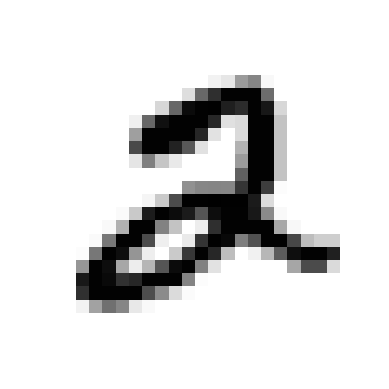

In [7]:
draw_image(5)

The following image is classified as:  0


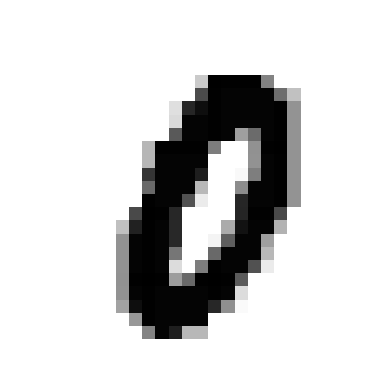

In [8]:
draw_image(34)

##### Adding more features for more accuracy

In [9]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_numpy = X.to_numpy()
X_numpy

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [11]:
from scipy.ndimage import shift
X_aug =[]
y_aug =[]
for dir in ['left','right', 'up', 'down']:
    for i in range(len(X_numpy)):
        img = X.iloc[i].to_numpy().reshape(28,28) 
        label = y.iloc[i]
        if dir.lower() == 'left':
            shifted = shift(img,[0,-1],cval = 0)
        elif dir.lower() == 'right':
            shifted = shift(img,[0,1],cval = 0)
        elif dir.lower() == 'up':
            shifted = shift(img,[-1,0],cval = 0)
        elif dir.lower() == 'down':
            shifted = shift(img,[-1,0],cval = 0)
        X_aug.append(shifted.flatten())
        y_aug.append(label)

In [13]:
import numpy as np
X = np.concat([X,X_aug],axis = 0)
y = np.concat([y,y_aug], axis = 0)

In [14]:
print("Original shape:", X.shape)
print("Augmented shape:", np.array(X_aug).shape)

Original shape: (350000, 784)
Augmented shape: (280000, 784)


In [16]:
y = y.astype("float32")
X = X.astype("float32")/255.0

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##### Training the model


In [18]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge")  # hinge = linear SVM
clf.fit(X_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [ ]:
y_pred = clf.predict(X_test)

In [20]:
y_pred

array([9., 7., 1., ..., 3., 1., 8.], shape=(70000,), dtype=float32)

In [21]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: ", accuracy_score(y_test,y_pred))

Accuracy Score:  0.8933


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6787,    5,   16,   17,   20,   41,   46,    7,   72,    2],
       [   4, 7716,   48,   24,    5,   41,    7,   11,   84,    8],
       [  98,   97, 6034,   50,  130,   34,   95,  122,  260,   24],
       [  58,   69,  236, 5891,    8,  244,   20,   98,  255,  101],
       [  21,   65,   32,   11, 6207,   19,   38,   27,  108,  309],
       [ 106,   55,   63,  297,   88, 5198,  162,   36,  202,   79],
       [  59,   85,   49,    3,   62,  102, 6449,   11,   83,    2],
       [  49,   75,  117,   36,  103,   23,    6, 6630,   47,  236],
       [ 110,  254,   75,  111,   62,  266,   51,   52, 5726,  112],
       [  67,   96,   29,  114,  247,   89,    2,  276,  133, 5893]])

In [30]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6787,    5,   16,   17,   20,   41,   46,    7,   72,    2],
       [   4, 7716,   48,   24,    5,   41,    7,   11,   84,    8],
       [  98,   97, 6034,   50,  130,   34,   95,  122,  260,   24],
       [  58,   69,  236, 5891,    8,  244,   20,   98,  255,  101],
       [  21,   65,   32,   11, 6207,   19,   38,   27,  108,  309],
       [ 106,   55,   63,  297,   88, 5198,  162,   36,  202,   79],
       [  59,   85,   49,    3,   62,  102, 6449,   11,   83,    2],
       [  49,   75,  117,   36,  103,   23,    6, 6630,   47,  236],
       [ 110,  254,   75,  111,   62,  266,   51,   52, 5726,  112],
       [  67,   96,   29,  114,  247,   89,    2,  276,  133, 5893]])

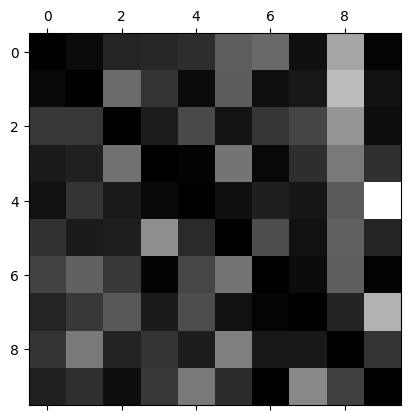

In [35]:
cm = cm / cm.sum(axis=1, keepdims=True)
np.fill_diagonal(cm, 0)
plt.matshow(cm, cmap = plt.cm.gray)

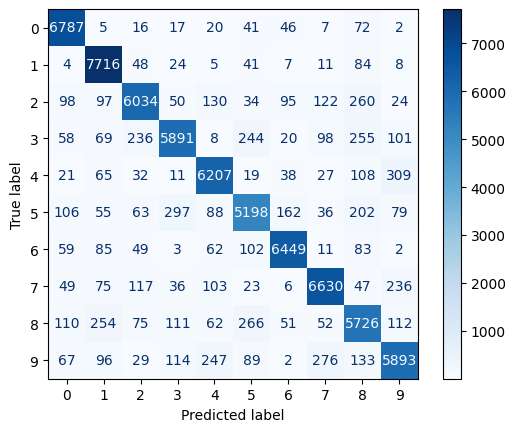

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot(cmap = 'Blues')
plt.show()